In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("weather.csv")
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Outlook,Temperature,Humidity,Windy,Play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [2]:
from sklearn.preprocessing import LabelEncoder
processed_data=pd.DataFrame()
lb_make = LabelEncoder()
processed_data["Outlook"] = lb_make.fit_transform(data["Outlook"])
processed_data["Temperature"] = lb_make.fit_transform(data["Temperature"])
processed_data["Humidity"] = lb_make.fit_transform(data["Humidity"])
processed_data["Windy"] = lb_make.fit_transform(data["Windy"])

In [5]:
processed_data

,Outlook,Temperature,Humidity,Windy
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [3]:
features=processed_data.columns
print(features)

Index([u'Outlook', u'Temperature', u'Humidity', u'Windy'], dtype='object')


In [6]:
features_raw=processed_data.columns[-1]
features_raw

'Windy'

In [141]:
feature_data=processed_data[features_raw]
feature_data

,Outlook,Temperature,Humidity
0,0,1,0
1,0,0,1
2,0,2,0
3,0,1,1
4,1,2,0
5,1,0,1
6,1,0,1
7,1,2,1
8,1,2,0
9,2,1,0


In [142]:
predict_class=data.columns[-1]
predictions=data[predict_class]
predictions

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6      no
7     yes
8      no
9      no
10     no
11     no
12    yes
13    yes
Name: Play, dtype: object

In [143]:
predict_class = predictions.apply(lambda x: 0 if x == "no" else 1)
predict_class

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: Play, dtype: int64

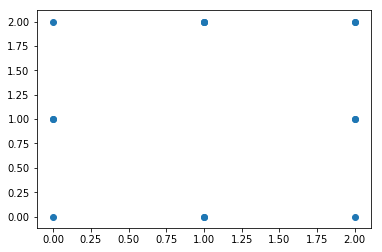

In [144]:
#processed_data.plot(processed_data["Outlook"], processed_data["Temperature"], kind="scatter",color="red")
plt.scatter(processed_data["Outlook"], processed_data["Temperature"])
plt.show()

In [145]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(processed_data, predict_class, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 11 samples.
Testing set has 3 samples.


In [146]:
#SVM Classifier

import sklearn
from sklearn import svm

from sklearn.model_selection import cross_val_score

C = 1.0
svc = svm.SVC(kernel='linear',C=C,gamma=2)
cv_scores = cross_val_score(knn, feature_data, predict_class, cv=2)
cv_scores.mean()

0.6458333333333333

In [147]:
svc.fit(X_train, y_train)
predictions_svm = svc.predict(X_test)
predictions_svm

array([1, 1, 1])

In [148]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
# Model Accuracy: how often is the classifier correct?
print(confusion_matrix(y_test,predictions_svm))  

[[0 1]
 [0 2]]


In [149]:
print(classification_report(y_test,predictions_svm)) 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

   micro avg       0.67      0.67      0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



In [150]:
print('Accuracy is',metrics.accuracy_score(y_test,predictions_svm)) 

('Accuracy is', 0.6666666666666666)


In [153]:
#K Nearest Neighbour Algorithm

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
cv_score = cross_val_score(knn, feature_data, predict_class, cv=2)

cv_score.mean()

0.6458333333333333

In [154]:
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
predictions_knn

array([1, 1, 1])

In [155]:
print('Accuracy is',metrics.accuracy_score(y_test,predictions_knn)) 

('Accuracy is', 0.6666666666666666)
